M. Amintoosi

# Play with Conv layers and filters

In [221]:
import keras
from keras import layers
from keras import models
import tensorflow as tf
from tensorflow.keras import initializers
import numpy as np
import matplotlib.pyplot as plt
keras.__version__

'2.14.0'

https://keras.io/api/layers/convolution_layers/convolution1d/

In [222]:
n_filters = 1
model = models.Sequential()
model.add(layers.Conv1D(n_filters, 3, input_shape=(None, 5), use_bias=False))

In [223]:
x = np.array([1,2,3,4,5],dtype='float')
x = tf.reshape(x, (1, 5, 1)) # reshape it to match the input shape of Conv1D
# create a model with one Conv1D layer
model = models.Sequential()
model.add(layers.Conv1D(1, 3, input_shape=(5, 1),
                        kernel_initializer=initializers.Constant([1/3, 1/3, 1/3])))
print(model.weights)

[<tf.Variable 'conv1d_71/kernel:0' shape=(3, 1, 1) dtype=float32, numpy=
array([[[0.33333334]],

       [[0.33333334]],

       [[0.33333334]]], dtype=float32)>, <tf.Variable 'conv1d_71/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [224]:
y = model(x) # apply the Conv1D layer to the input vector
print(y.shape, y) # print the shape of the output tensor

(1, 3, 1) tf.Tensor(
[[[2.]
  [3.]
  [4.]]], shape=(1, 3, 1), dtype=float32)


151 2.24075511097908
(490,) (488,)


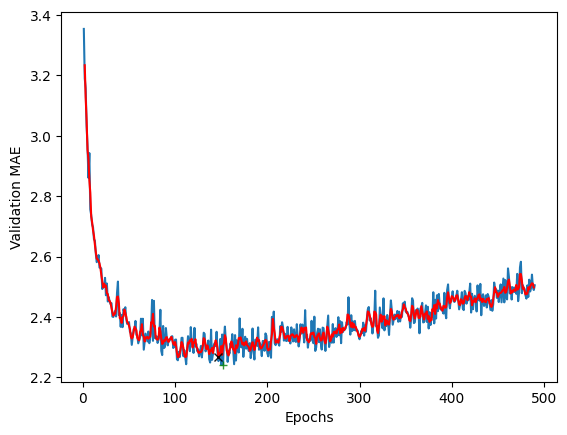

In [225]:
x = np.load("truncated_mae_history.npy") 
print(np.argmin(x), np.min(x))
model = models.Sequential()
model.add(layers.Conv1D(1, 3, input_shape=(len(x), 1),
                        kernel_initializer=initializers.Constant([1/3, 1/3, 1/3])))

X = tf.reshape(x, (1, len(x), 1))
y = model(X)
y = np.squeeze(y)
print(x.shape, y.shape)
plt.plot(range(1, len(x) + 1), x)
plt.plot(np.argmin(x)+1, np.min(x), 'g+', alpha=0.8)

plt.plot(range(2, len(y) +2 ), y, 'r')
plt.plot(np.argmin(y)+2, np.min(y), 'kx', alpha=0.9)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [226]:
w = np.ones((1,9))/9
w

array([[0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
        0.11111111, 0.11111111, 0.11111111, 0.11111111]])

103 2.2856743


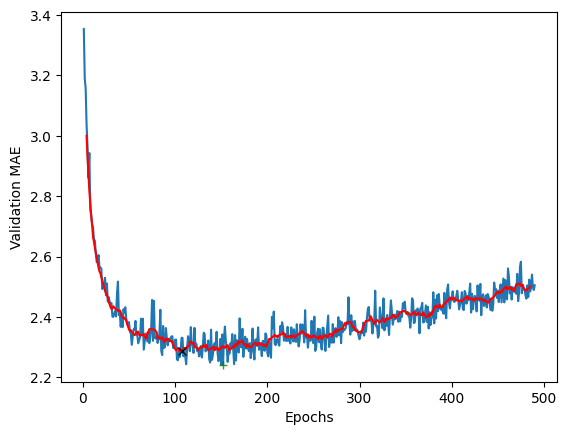

In [227]:
w = np.ones((9))/9
model = models.Sequential()
model.add(layers.Conv1D(1, w.shape[0], input_shape=(len(x), 1),
                        kernel_initializer=initializers.Constant(w)))

X = tf.reshape(x, (1, len(x), 1))
y = model(X)
y = np.squeeze(y)
print( np.argmin(y), np.min(y))

plt.plot(range(1, len(x) + 1), x)
plt.plot(np.argmin(x)+1, np.min(x), 'g+', alpha=0.8)

plt.plot(range(w.shape[0]//2, len(y) +w.shape[0]//2), y, 'r')
plt.plot(np.argmin(y)+w.shape[0]//2, np.min(y), 'kx', alpha=0.9)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

123 2.2933633


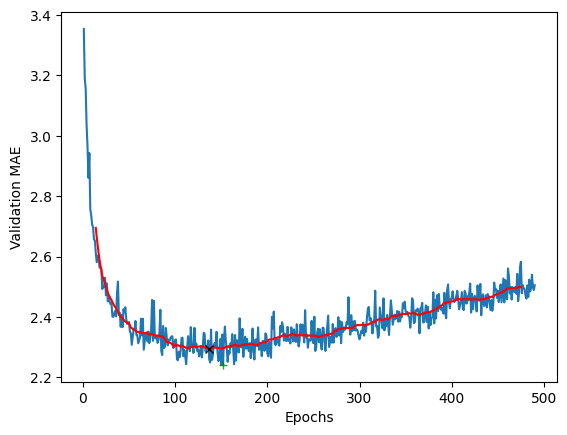

In [228]:
w = np.ones((29))/29
model = models.Sequential()
model.add(layers.Conv1D(1, w.shape[0], input_shape=(len(x), 1),
                        kernel_initializer=initializers.Constant(w)))

X = tf.reshape(x, (1, len(x), 1))
y = model(X)
y = np.squeeze(y)
print( np.argmin(y), np.min(y))

plt.plot(range(1, len(x) + 1), x)
plt.plot(np.argmin(x)+1, np.min(x), 'g+', alpha=0.8)

plt.plot(range(w.shape[0]//2, len(y) +w.shape[0]//2), y, 'r')
plt.plot(np.argmin(y)+w.shape[0]//2, np.min(y), 'kx', alpha=0.9)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [229]:
w.shape[0]//2, y.shape, x.shape

(14, (462,), (490,))

In [230]:
n_channels = 1
n_filters = 1
model = models.Sequential()
model.add(layers.Conv2D(n_filters, (3, 3), input_shape=(3, 3, n_channels)))

In [231]:
model.summary()

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 1, 1, 1)           10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [232]:
model.layers[0].get_weights()[0].shape, model.layers[0].get_weights()[0]

((3, 3, 1, 1),
 array([[[[ 0.44355667]],
 
         [[-0.42787296]],
 
         [[-0.10627982]]],
 
 
        [[[ 0.44625974]],
 
         [[ 0.03259552]],
 
         [[ 0.2949037 ]]],
 
 
        [[[-0.2683138 ]],
 
         [[-0.21905151]],
 
         [[ 0.1747703 ]]]], dtype=float32))

The difference between model.weights and model.layers[i].get_weights() in TF is that model.weights returns a list of all the weights and biases of the model, while model.layers[i].get_weights() returns a list of the weights and biases of the i-th layer of the model.

In [233]:
model.weights

[<tf.Variable 'conv2d_11/kernel:0' shape=(3, 3, 1, 1) dtype=float32, numpy=
 array([[[[ 0.44355667]],
 
         [[-0.42787296]],
 
         [[-0.10627982]]],
 
 
        [[[ 0.44625974]],
 
         [[ 0.03259552]],
 
         [[ 0.2949037 ]]],
 
 
        [[[-0.2683138 ]],
 
         [[-0.21905151]],
 
         [[ 0.1747703 ]]]], dtype=float32)>,
 <tf.Variable 'conv2d_11/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [234]:
input = np.random.randint(0, 10, size=(3, 3, n_channels))
input.shape, input, input[:,:,0]

((3, 3, 1),
 array([[[4],
         [5],
         [8]],
 
        [[8],
         [7],
         [9]],
 
        [[1],
         [2],
         [5]]]),
 array([[4, 5, 8],
        [8, 7, 9],
        [1, 2, 5]]))

In [235]:
# model.predict(input)

In [236]:
x = input[np.newaxis,:,:,:]
x.shape

(1, 3, 3, 1)

In [237]:
model.predict(x)

1/1 [==============================] - 0s 58ms/step


array([[[[5.4044375]]]], dtype=float32)

In [238]:
w = model.weights[0]
w.shape

TensorShape([3, 3, 1, 1])

In [239]:
w = np.squeeze(w, axis=(2, 3))
w.shape, w

((3, 3),
 array([[ 0.44355667, -0.42787296, -0.10627982],
        [ 0.44625974,  0.03259552,  0.2949037 ],
        [-0.2683138 , -0.21905151,  0.1747703 ]], dtype=float32))

In [240]:
np.sum(input[:,:,0]*w)

5.404437750577927

تغییر تعداد کانال‌های رنگ ورودی

In [241]:
n_channels = 2
n_filters = 1
model = models.Sequential()
model.add(layers.Conv2D(n_filters, (3, 3), input_shape=(3, 3, n_channels)))
model.summary()

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 1, 1, 1)           19        
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [242]:
input = np.random.randint(0, 10, size=(3, 3, n_channels))
input.shape, input[:,:,0]

((3, 3, 2),
 array([[3, 5, 3],
        [2, 8, 1],
        [1, 5, 6]]))

In [248]:
x = input[np.newaxis,:,:,:]
# x.shape
# model(x)
model.predict(x)

1/1 [==============================] - 0s 28ms/step


array([[[[-9.061067]]]], dtype=float32)

In [244]:
w = model.weights[0]
w.shape

TensorShape([3, 3, 2, 1])

In [245]:
w = np.squeeze(w)
w.shape, w

((3, 3, 2),
 array([[[ 0.30809596,  0.06875464],
         [-0.4150034 ,  0.32306007],
         [-0.3479537 ,  0.06562093]],
 
        [[ 0.44822666,  0.06509742],
         [-0.25243074, -0.37541682],
         [-0.32167822, -0.45042056]],
 
        [[ 0.14431044, -0.1737555 ],
         [-0.18241572, -0.27713758],
         [ 0.09662858, -0.25153306]]], dtype=float32))

In [246]:
np.sum(input*w)

-9.061066180467606